In [15]:
import seaborn as sns
from numpy import loadtxt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from SHARED.params import *
from SHARED.display_trajectories import *
# matplotlib.use('Agg')
%matplotlib widget




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


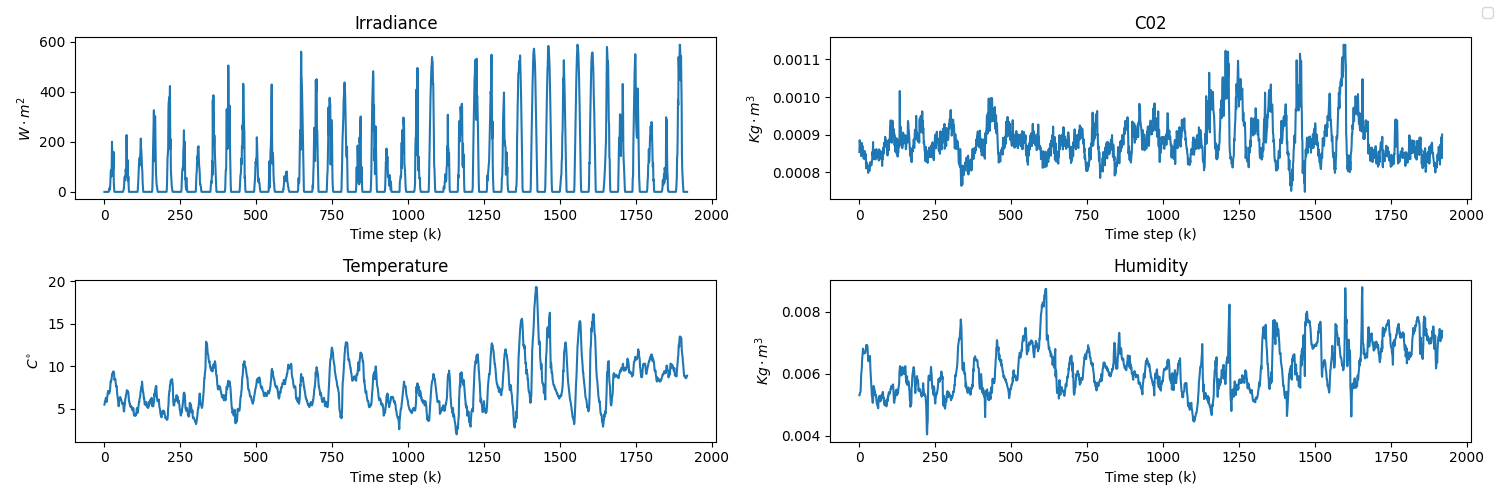

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [16]:



#Weather Data
results_path = "results/RL/Deterministic/agent_14/D_log.csv"

D_log = loadtxt(results_path, delimiter=',')

plt.figure(figsize=(15, 5))
plt.subplot(2,2,1)
plt.plot (D_log[:,0])
plt.title('Irradiance')
plt.ylabel("$W \cdot m^2$")
plt.xlabel("Time step (k)")

plt.subplot(2,2,2)
plt.plot (D_log[:,1])
plt.title('C02')
plt.ylabel("$Kg \cdot m^3$")
plt.xlabel("Time step (k)")

plt.subplot(2,2,3)
plt.plot (D_log[:,2])
plt.title('Temperature')
plt.ylabel("$C^{\circ}$")
plt.xlabel("Time step (k)")

plt.subplot(2,2,4)
plt.plot (D_log[:,3])
plt.title('Humidity')
plt.ylabel("$Kg \cdot m^3$")
plt.xlabel("Time step (k)")


plt.tight_layout()
plt.figlegend()
plt.show()

plt.savefig('TU Delft Thesis/figures/weather_data.eps', format='eps')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


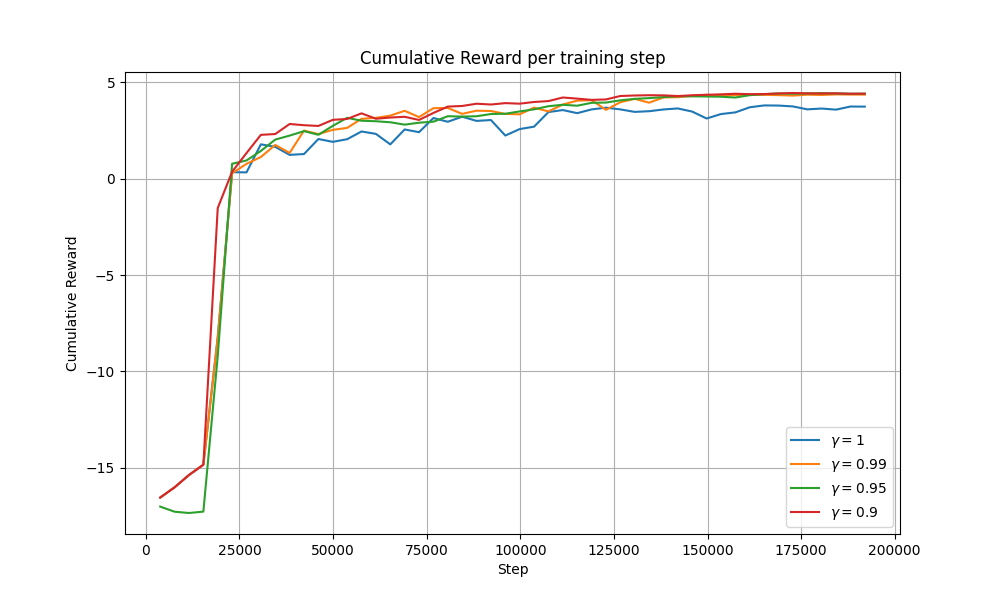

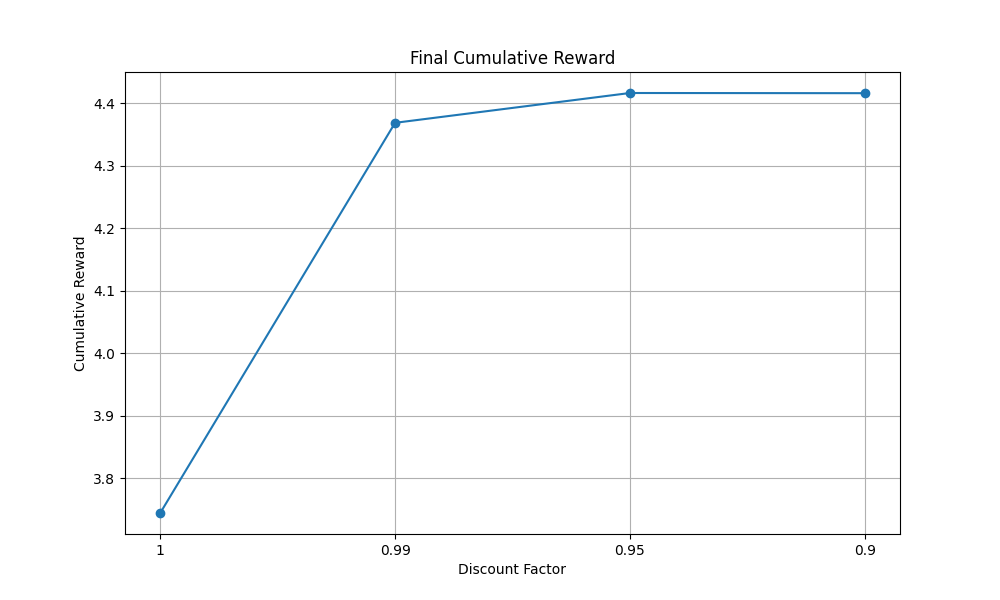

In [17]:
agent_6_with_header = np.genfromtxt('results/RL/Deterministic/agent_6.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')
agent_9_with_header = np.genfromtxt('results/RL/Deterministic/agent_9.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')
agent_10_with_header = np.genfromtxt('results/RL/Deterministic/agent_10.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')
agent_14_with_header = np.genfromtxt('results/RL/Deterministic/agent_14.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')
agent_11_with_header = np.genfromtxt('results/RL/Deterministic/agent_11.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')

plt.figure(figsize=(10,6))
plt.title('Cumulative Reward per training step')
# plt.subplot(1,2,1)
plt.plot(agent_6_with_header['Step'],agent_6_with_header['Value'], label = '$\gamma = 1$')
plt.plot(agent_9_with_header['Step'],agent_9_with_header['Value'], label = '$\gamma = 0.99$')
plt.plot(agent_14_with_header['Step'],agent_14_with_header['Value'], label = '$\gamma = 0.95$')
plt.plot(agent_10_with_header['Step'],agent_10_with_header['Value'], label = '$\gamma = 0.9$')
plt.grid()
plt.legend()
plt.ylabel("Cumulative Reward")
plt.xlabel("Step")
plt.savefig('TU Delft Thesis/figures/gamma_reward_training.eps', format='eps')

plt.figure(figsize=(10,6))
plt.title('Final Cumulative Reward')
cum_rewards = [agent_6_with_header['Value'][-1],agent_9_with_header['Value'][-1],agent_14_with_header['Value'][-1],agent_10_with_header['Value'][-1]]
discount_factor = ['1','0.99','0.95','0.9']
plt.plot(discount_factor,cum_rewards,marker='o')
plt.grid()
plt.ylabel("Cumulative Reward")
plt.xlabel("Discount Factor")
plt.savefig('TU Delft Thesis/figures/gamma_reward_final.eps', format='eps')


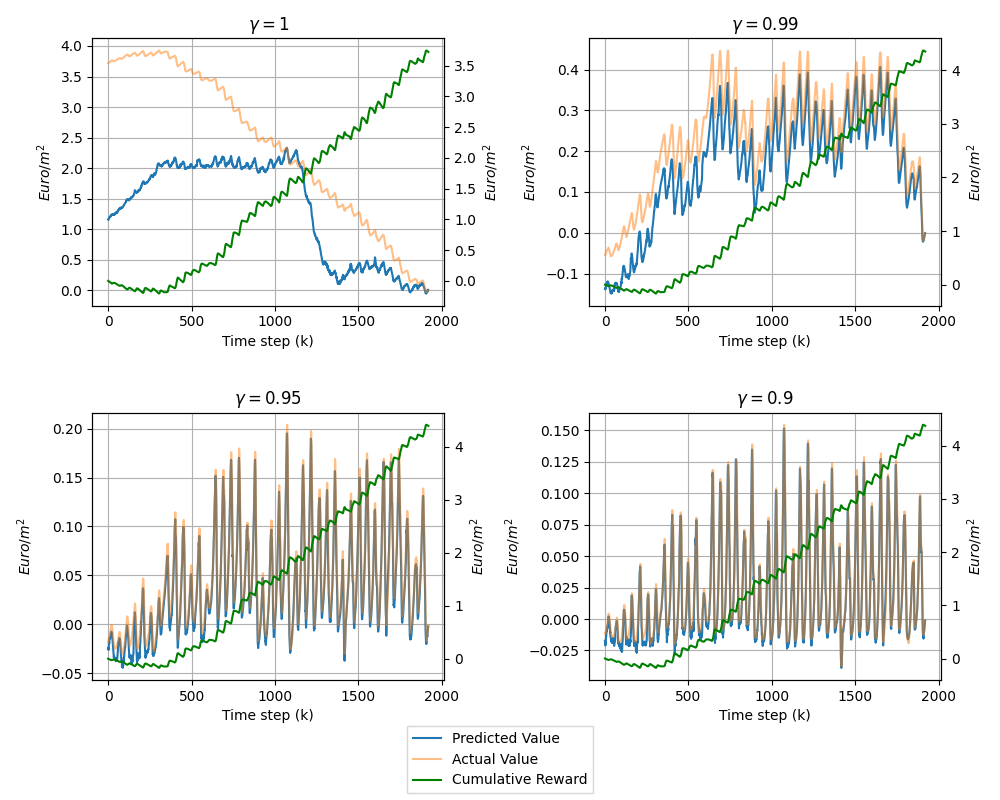

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [38]:
agent_6_rewards              = loadtxt('results/RL/Deterministic/agent_6/rewards_log.csv', delimiter=',')
agent_6_values               = loadtxt('results/RL/Deterministic/agent_6/vf_log.csv', delimiter=',')
agent_6_cost             = loadtxt('results/RL/Deterministic/agent_6/cost_log.csv', delimiter=',')

agent_9_rewards              = loadtxt('results/RL/Deterministic/agent_9/rewards_log.csv', delimiter=',')
agent_9_values               = loadtxt('results/RL/Deterministic/agent_9/vf_log.csv', delimiter=',')
agent_9_cost             = loadtxt('results/RL/Deterministic/agent_9/cost_log.csv', delimiter=',')

agent_10_rewards              = loadtxt('results/RL/Deterministic/agent_10/rewards_log.csv', delimiter=',')
agent_10_values               = loadtxt('results/RL/Deterministic/agent_10/vf_log.csv', delimiter=',')
agent_10_cost             = loadtxt('results/RL/Deterministic/agent_10/cost_log.csv', delimiter=',')

agent_14_rewards              = loadtxt('results/RL/Deterministic/agent_14/rewards_log.csv', delimiter=',')
agent_14_values               = loadtxt('results/RL/Deterministic/agent_14/vf_log.csv', delimiter=',')
agent_14_cost             = loadtxt('results/RL/Deterministic/agent_14/cost_log.csv', delimiter=',')

def actual_values(cost_log, gamma = 1):
    vf = []
    cum = 0
    for i,r in enumerate(reversed(cost_log)):
        cum += r
        vf.append(cum)
        cum *=gamma
    return vf[::-1]


agents_rewards = [agent_6_rewards, agent_9_rewards,  agent_14_rewards,agent_10_rewards]
agents_values = [agent_6_values, agent_9_values,  agent_14_values,agent_10_values,]
agents_actual_values = [actual_values(agent_6_cost, gamma = 1),actual_values(agent_9_cost, gamma = 0.99),actual_values(agent_14_cost, gamma = 0.95),actual_values(agent_10_cost,gamma = 0.9)]
gamma = [1,0.99,0.95,0.9]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot data
for i, (rewards, values, act_values) in enumerate(zip(agents_rewards, agents_values,agents_actual_values)):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    ax2 = ax.twinx() 
    
    ax2.plot(rewards,color = 'g', label='Cumulative Reward')
    ax2.set_ylabel("$Euro/m^2$")
    ax.plot(values, label="Predicted Value")
    # ax.plot(values + rewards[1:], label = 'Quality Measure')
    ax.plot(act_values, label = "Actual Value", alpha = 0.5)
    ax.grid()
    ax.set_ylabel("$Euro/m^2$")
    ax.set_xlabel("Time step (k)")
    ax.set_title(f"$\gamma = ${gamma[i]}")

# Get handles and labels for the legend
handles, labels = axs[0, 0].get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Add figlegend
fig.legend(handles+handles2, labels+labels2, loc='lower center', bbox_to_anchor=(0.5, -0.00), fancybox=False, shadow=False)

# Adjust layout
plt.tight_layout()
fig.subplots_adjust(bottom=0.15,hspace=0.4)
# Display the plot
plt.show()

plt.savefig('TU Delft Thesis/figures/vf_vs_gamma.pdf', format='pdf')

/tmp/ipykernel_11018/3898905630.py:40: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


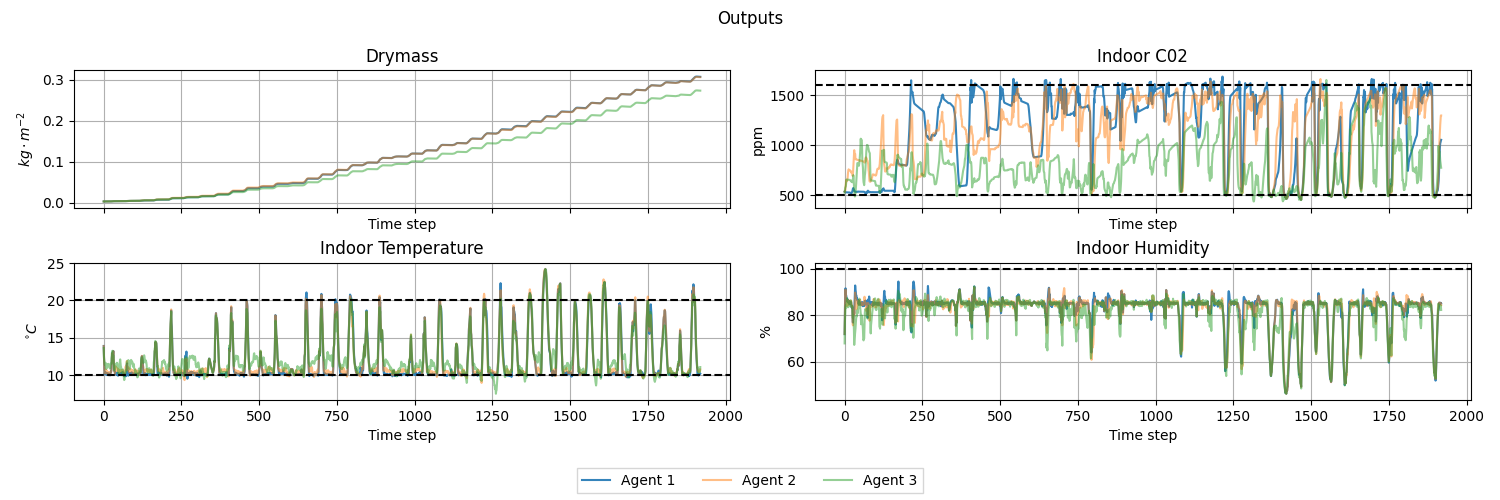

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
/tmp/ipykernel_11018/3898905630.py:68: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


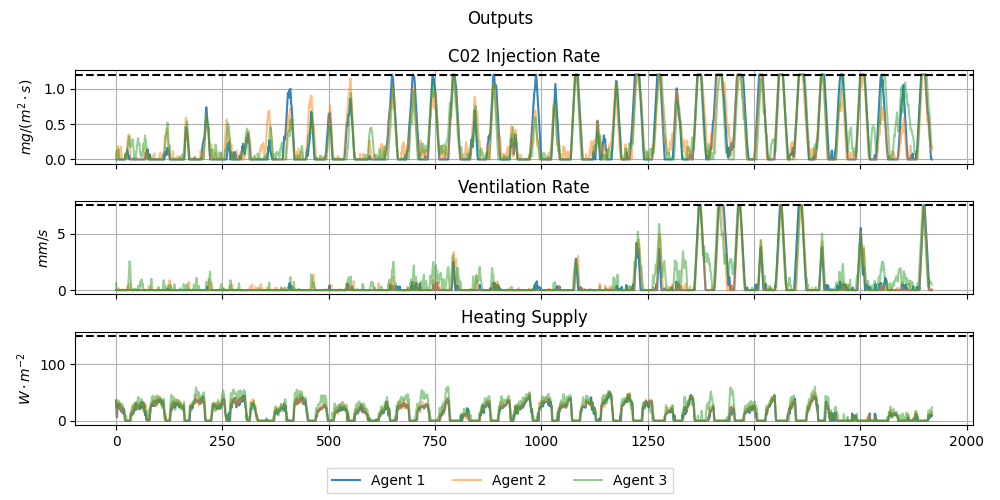

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [19]:
agent_1_outputs              = loadtxt('results/RL/Deterministic/agent_11_abs/Y_log.csv', delimiter=',')
agent_1_inputs             = loadtxt('results/RL/Deterministic/agent_11_abs/U_log.csv', delimiter=',')


agent_2_outputs              = loadtxt('results/RL/Deterministic/agent_11_abs_tanh/Y_log.csv', delimiter=',')
agent_2_inputs             = loadtxt('results/RL/Deterministic/agent_11_abs_tanh/U_log.csv', delimiter=',')

agent_3_outputs              = loadtxt('results/RL/Deterministic/agent_6_abs_tanh/Y_log.csv', delimiter=',')
agent_3_inputs             = loadtxt('results/RL/Deterministic/agent_6_abs_tanh/U_log.csv', delimiter=',')

fig, axs_y = plt.subplots(2,2, sharex=True, sharey=False, layout='constrained', figsize=(15, 5))
fig.suptitle("Outputs")
    
for i, (title, ylabel) in enumerate([("Drymass", "$kg \cdot m^{-2}$"), ("Indoor C02", "ppm"),
                                    ("Indoor Temperature", "$^{\circ}C$"), ("Indoor Humidity","%")]):
    ax = axs_y[i // 2, i % 2]
    # ax = axs_y[i]
    ax.set_title(title)
    ax.plot(agent_1_outputs[:,i],alpha = 0.9,     label = "Agent 1")
    ax.plot(agent_2_outputs[:,i],alpha = 0.5,     label = "Agent 2")
    ax.plot(agent_3_outputs[:,i],alpha = 0.5,     label = "Agent 3")
    ax.grid(True)
    ax.set_ylabel(ylabel)
    ax.set_xlabel("Time step")
    # ax.legend()

axs_y[0,1].axhline(y=C02_MAX_CONSTRAIN_MPC,color = 'k' ,linestyle = '--')
axs_y[0,1].axhline(y=C02_MIN_CONSTRAIN_MPC,color = 'k' ,linestyle = '--')

#Humidity Constrains
axs_y[1,1].axhline(y=HUM_MAX_CONSTRAIN,color = 'k' ,linestyle = '--')

#Temperature Constrains
axs_y[1,0].axhline(y=TEMP_MAX_CONSTRAIN_MPC,color = 'k' ,linestyle = '--')
axs_y[1,0].axhline(y=TEMP_MIN_CONSTRAIN_MPC,color = 'k' ,linestyle = '--')

handles, labels = axs_y[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.00), fancybox=False, shadow=False, ncol = 3)

plt.tight_layout()
fig.subplots_adjust(bottom=0.2,hspace=0.4)
plt.show()
plt.savefig('TU Delft Thesis/figures/selected_policies_outputs.eps', format='eps')


fig, axs_u = plt.subplots(3,1, sharex=True, sharey=False, layout='constrained', figsize=(10, 5))
fig.suptitle("Outputs")
    
for i, (title, ylabel) in enumerate([("C02 Injection Rate", "$mg/(m^{2} \cdot s)$"), ("Ventilation Rate", "$mm/s$"),
                                            ("Heating Supply", "$W \cdot m^{-2}$")]):
    # ax = axs_y[i // 2, i % 2]
    ax = axs_u[i]
    ax.set_title(title)
    ax.plot(agent_1_inputs[:,i],alpha = 0.9,    label = "Agent 1")
    ax.plot(agent_2_inputs[:,i],alpha = 0.5,    label = "Agent 2")
    ax.plot(agent_3_inputs[:,i],alpha = 0.5,    label = "Agent 3")
    ax.grid(True)
    ax.set_ylabel(ylabel)
    # ax.legend()
    
axs_u[0].axhline(y=u_max[0],color = 'k' ,linestyle = '--')
axs_u[1].axhline(y=u_max[1],color = 'k' ,linestyle = '--')
axs_u[2].axhline(y=u_max[2],color = 'k' ,linestyle = '--')

handles, labels = axs_u[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.00), fancybox=False, shadow=False, ncol = 3)

plt.tight_layout()
fig.subplots_adjust(bottom=0.15,hspace=0.4)
plt.show()
plt.savefig('TU Delft Thesis/figures/selected_policies_inputs.pdf', format='pdf')

results/RL/Stochastic/nominal/0.2_0


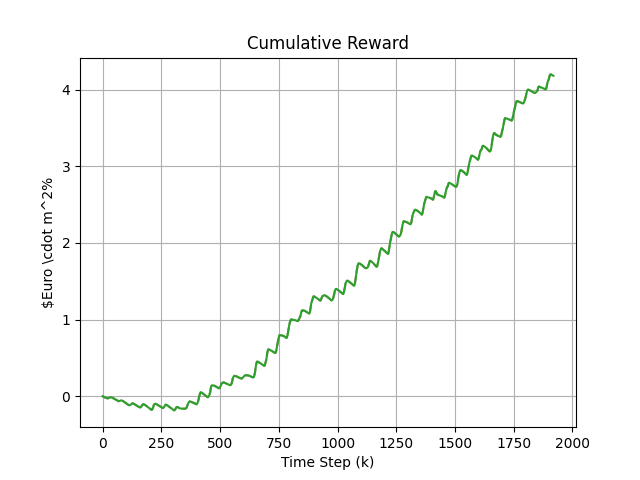

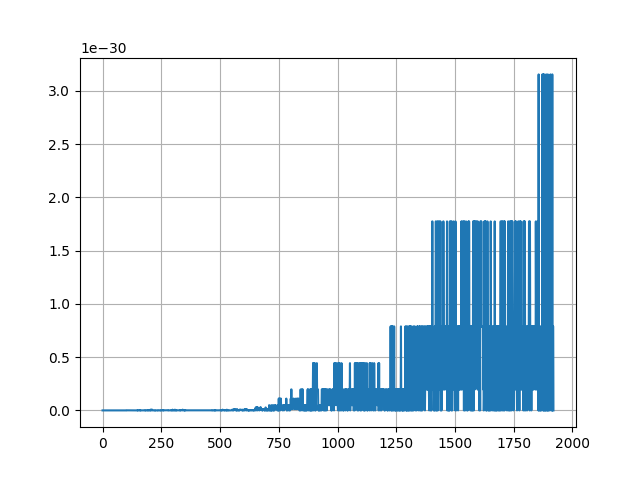

----------------------------  ------------
EPI                (EURO/m2)   4.78167
Total growth       (kg/m2)     0.297021
Total C02 usage    (kg/m2)     1.00681
Total Heating      (kWh)      12.846
Computational Time (s)         0.000211046
FINAL PERFORMANCE              4.17827
Variance                       0
----------------------------  ------------


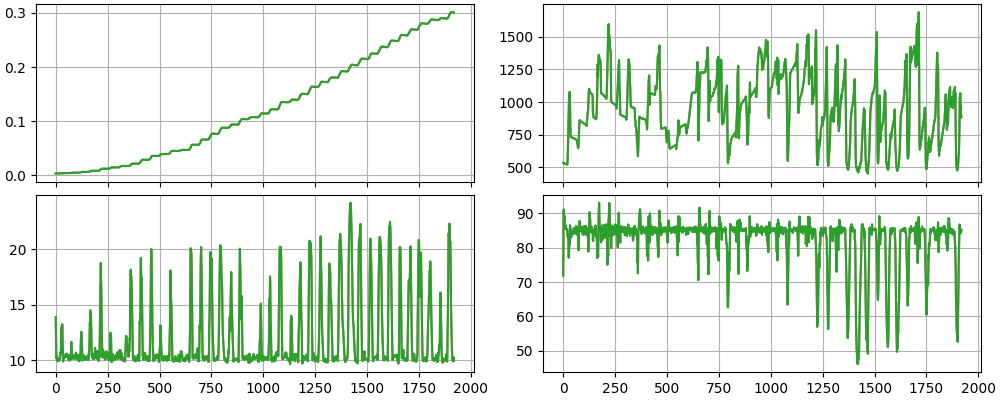

In [20]:


# path = 'results/RL/Stochastic/0.05/scale_' + str(0.05)
path = 'results/RL/Stochastic/nominal/0.2_' + str(0)
# path = 'results/MPC/Stochastic/1_hr/scale_' + str(noise_scale)
print (path)
average_metrics(path)


/tmp/ipykernel_11018/4018710548.py:40: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


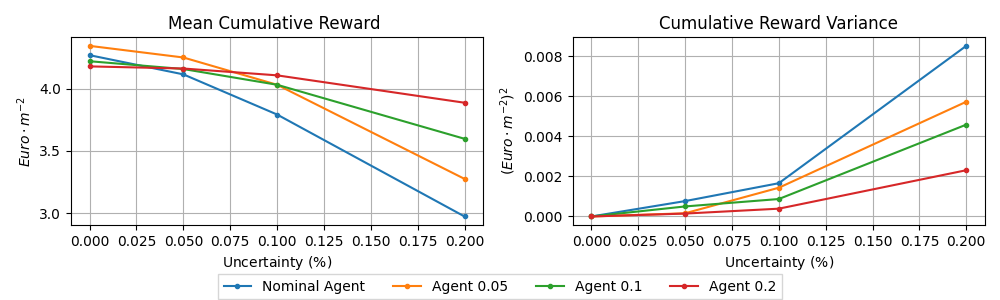

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [21]:
#mean
mean_agent_005 = [4.3432,4.24985,4.03077,3.2749]
mean_agent_01  = [4.21976,4.15714,4.03076,3.59688]
mean_agent_02 = [4.17827,4.16127,4.10644,3.88648]
mean_nominal = [4.2683,4.1143,3.79179,2.97292]

#variance
variance_agent_005 = [0,0.00015972,0.00143446,0.00572537]
variance_agent_01  = [0,0.000500268,0.000870857,0.0045832]
variance_agent_02 = [0,0.000144415,0.000389025,0.00230789]
variance_nominal = [0,0.000767577,0.00166026,0.00851586]

x = [0, 0.05, 0.1, 0.2]
# Create subplots
fig, (ax1, ax2) = plt.subplots(1,2, sharex=False,figsize=(10, 3),layout='constrained')

# Plotting the means
ax1.plot(x, mean_nominal,marker = '.', label='Nominal Agent')
ax1.plot(x, mean_agent_005, marker = '.', label='Agent 0.05')
ax1.plot(x, mean_agent_01, marker = '.',label='Agent 0.1')
ax1.plot(x, mean_agent_02, marker = '.',label='Agent 0.2')
ax1.set_ylabel('$Euro \cdot m^{-2} $')
ax1.set_title('Mean Cumulative Reward ')
ax1.set_xlabel('Uncertainty ($\%$)')
ax1.grid(True)

# Plotting the variances
ax2.plot(x, variance_nominal, marker = '.',label='Nominal Agent')
ax2.plot(x, variance_agent_005,marker = '.', label='Agent 0.05')
ax2.plot(x, variance_agent_01, marker = '.',label='Agent 0.1')
ax2.plot(x, variance_agent_02, marker = '.',label='Agent 0.2')
ax2.set_xlabel('Uncertainty ($\%$)')
ax2.set_ylabel('$(Euro \cdot m^{-2} )^2$')
ax2.set_title('Cumulative Reward Variance')
ax2.grid(True)

# Create a shared legend
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.02), fancybox=False, shadow=False, ncol = 4)
plt.tight_layout()
fig.subplots_adjust(bottom=0.25, hspace=0.4)
# plt.tight_layout()
plt.show()
plt.savefig('TU Delft Thesis/figures/stochastic_rl_policies.eps', format='eps')

/tmp/ipykernel_11018/3979278710.py:42: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


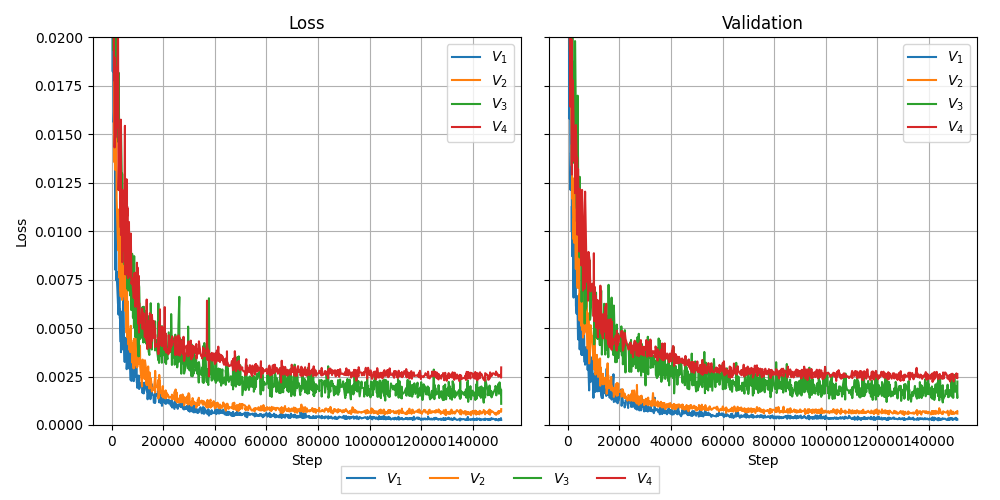

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [22]:
deep_full = np.genfromtxt('results/deep_full.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')
deep_less = np.genfromtxt('results/deep_less.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')
deep_reduced = np.genfromtxt('results/deep_reduced.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')
shallow_full = np.genfromtxt('results/shallow_full.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')


deep_full_val = np.genfromtxt('results/deep_full_val.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')
deep_less_val = np.genfromtxt('results/deep_less_val.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')
deep_reduced_val = np.genfromtxt('results/deep_reduced_val.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')
shallow_full_val = np.genfromtxt('results/shallow_full_val.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')

fig, axs = plt.subplots(1,2, sharex=False, sharey=True, layout='constrained', figsize=(10, 5))
loss_ax = axs[0]
val_ax = axs[1]

loss_ax.plot(deep_full['Step'],deep_full['Value'], label = "$V_1$")
loss_ax.plot(deep_less['Step'],deep_less['Value'], label = "$V_2$")
loss_ax.plot(shallow_full['Step'],shallow_full['Value'], label = "$V_3$")
loss_ax.plot(deep_reduced['Step'],deep_reduced['Value'], label = "$V_4$")
loss_ax.grid()
loss_ax.legend()
loss_ax.set_ylim([0, 0.02])
loss_ax.set_ylabel("Loss")
loss_ax.set_xlabel("Step")
loss_ax.set_title('Loss')


val_ax.plot(deep_full_val['Step'],deep_full_val['Value'], label = "$V_1$")
val_ax.plot(deep_less_val['Step'],deep_less_val['Value'], label = "$V_2$")
val_ax.plot(shallow_full_val['Step'],shallow_full_val['Value'], label = "$V_3$")
val_ax.plot(deep_reduced_val['Step'],deep_reduced_val['Value'], label = "$V_4$")
val_ax.grid()
val_ax.legend()
val_ax.set_ylim([0, 0.02])
val_ax.set_xlabel("Step")
val_ax.set_title('Validation')



handles, labels = loss_ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.00), fancybox=False, shadow=False, ncol = 4)
plt.tight_layout()
fig.subplots_adjust(bottom=0.15, hspace=0.4)

plt.show()

plt.savefig('TU Delft Thesis/figures/tr_training_graphs.eps', format='eps')

4.684890686591984
array([ 32.81186399,  65.565064  ,  99.44046401, 136.38093599,
       199.158099  , 225.04350801])


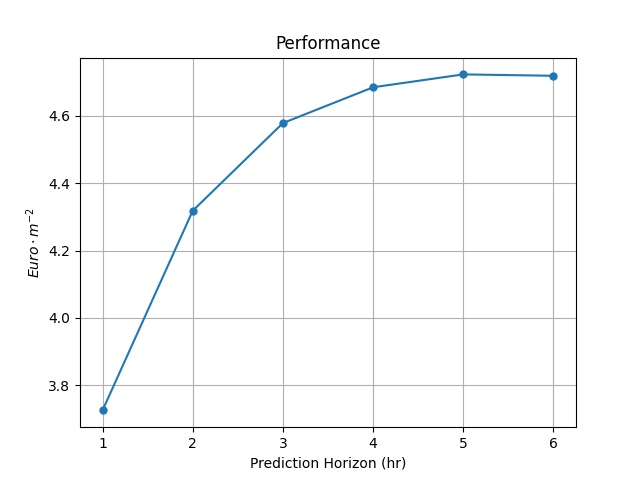

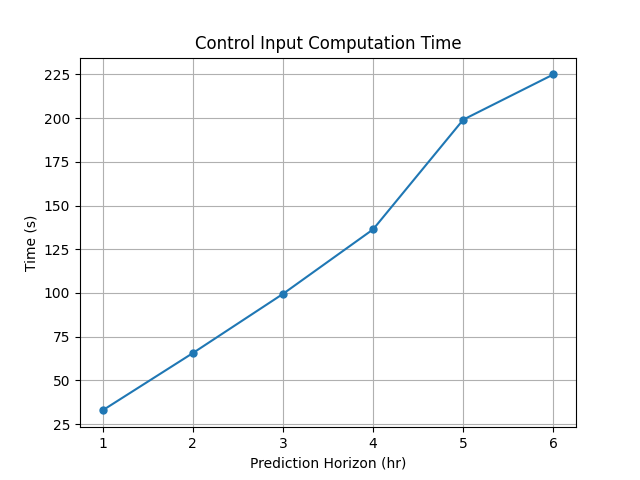

/tmp/ipykernel_11018/3492080797.py:90: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


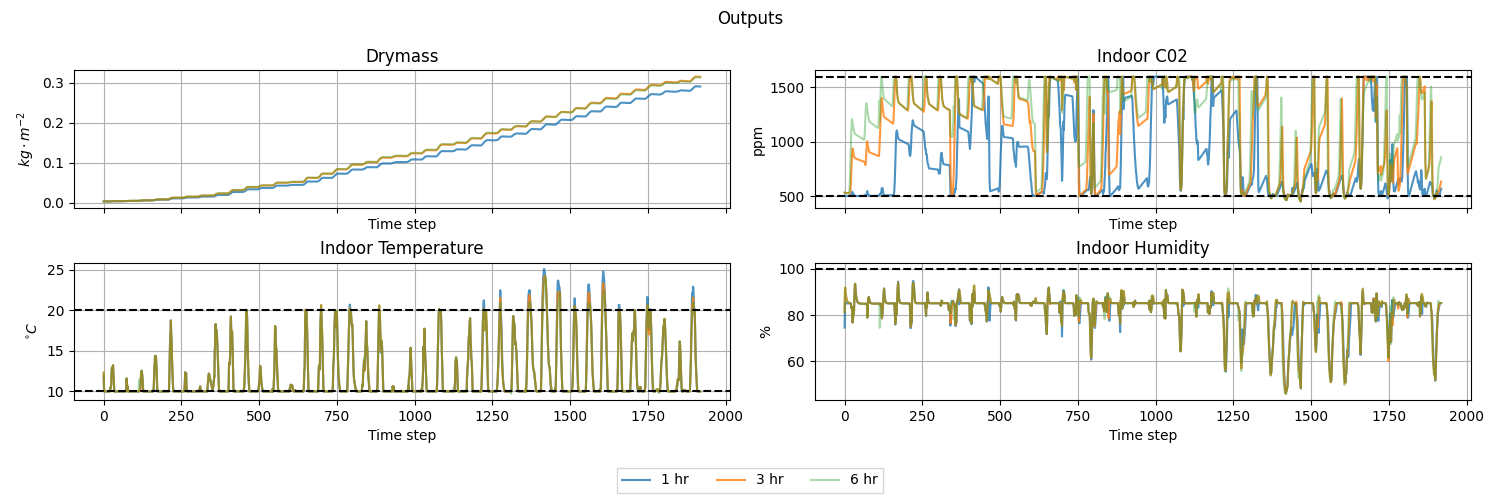

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
/tmp/ipykernel_11018/3492080797.py:118: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


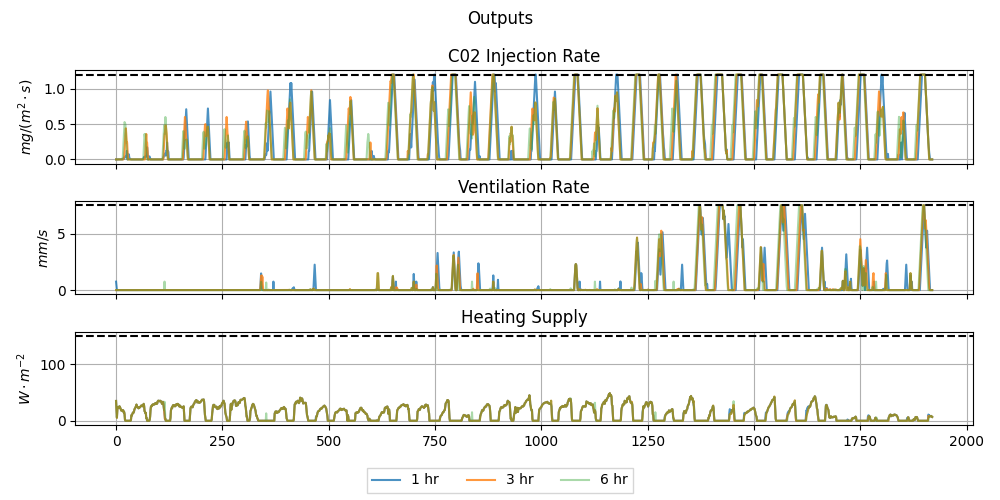

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


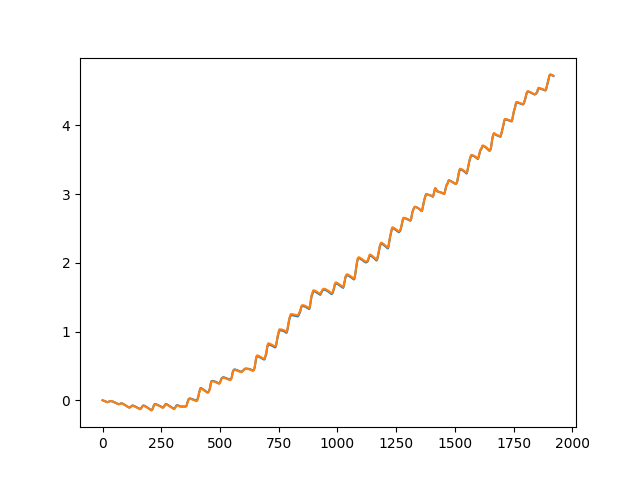

In [23]:
mpc_1hr_r               = loadtxt('results/MPC/Deterministic/1/Sim_0/rewards_log.csv', delimiter=',')
mpc_2hr_r              = loadtxt('results/MPC/Deterministic/2/Sim_0/rewards_log.csv', delimiter=',')
mpc_3hr_r              = loadtxt('results/MPC/Deterministic/3/Sim_0/rewards_log.csv', delimiter=',')
mpc_4hr_r              = loadtxt('results/MPC/Deterministic/4/Sim_0/rewards_log.csv', delimiter=',')
mpc_5hr_r              = loadtxt('results/MPC/Deterministic/5/Sim_0/rewards_log.csv', delimiter=',')
mpc_6hr_r              = loadtxt('results/MPC/Deterministic/6/Sim_0/rewards_log.csv', delimiter=',')

mpc_1hr_t              = loadtxt('results/MPC/Deterministic/1/Sim_0/comp_time_log.csv', delimiter=',')
mpc_2hr_t              = loadtxt('results/MPC/Deterministic/2/Sim_0/comp_time_log.csv', delimiter=',')
mpc_3hr_t              = loadtxt('results/MPC/Deterministic/3/Sim_0/comp_time_log.csv', delimiter=',')
mpc_4hr_t              = loadtxt('results/MPC/Deterministic/4/Sim_0/comp_time_log.csv', delimiter=',')
mpc_5hr_t              = loadtxt('results/MPC/Deterministic/5/Sim_0/comp_time_log.csv', delimiter=',')
mpc_6hr_t              = loadtxt('results/MPC/Deterministic/6/Sim_0/comp_time_log.csv', delimiter=',')

mpc_1hr_y              = loadtxt('results/MPC/Deterministic/1/Sim_0/Y_log.csv', delimiter=',')
mpc_2hr_y              = loadtxt('results/MPC/Deterministic/2/Sim_0/Y_log.csv', delimiter=',')
mpc_3hr_y              = loadtxt('results/MPC/Deterministic/3/Sim_0/Y_log.csv', delimiter=',')
mpc_4hr_y              = loadtxt('results/MPC/Deterministic/4/Sim_0/Y_log.csv', delimiter=',')
mpc_5hr_y              = loadtxt('results/MPC/Deterministic/5/Sim_0/Y_log.csv', delimiter=',')
mpc_6hr_y              = loadtxt('results/MPC/Deterministic/6/Sim_0/Y_log.csv', delimiter=',')

mpc_1hr_u              = loadtxt('results/MPC/Deterministic/1/Sim_0/U_log.csv', delimiter=',')
mpc_2hr_u              = loadtxt('results/MPC/Deterministic/2/Sim_0/U_log.csv', delimiter=',')
mpc_3hr_u              = loadtxt('results/MPC/Deterministic/3/Sim_0/U_log.csv', delimiter=',')
mpc_4hr_u              = loadtxt('results/MPC/Deterministic/4/Sim_0/U_log.csv', delimiter=',')
mpc_5hr_u              = loadtxt('results/MPC/Deterministic/5/Sim_0/U_log.csv', delimiter=',')
mpc_6hr_u              = loadtxt('results/MPC/Deterministic/6/Sim_0/U_log.csv', delimiter=',')

# agent_9_rewards               = loadtxt('results/RL/Deterministic/agent_9/rewards_log.csv', delimiter=',')
# agent_10_rewards              = loadtxt('results/RL/Deterministic/agent_10/rewards_log.csv', delimiter=',')
# agent_14_rewards              = loadtxt('results/RL/Deterministic/agent_14/rewards_log.csv', delimiter=',')

print(mpc_4hr_r[-1])
perf = np.array([mpc_1hr_r[-1],mpc_2hr_r[-1],mpc_3hr_r[-1],mpc_4hr_r[-1],mpc_5hr_r[-1],mpc_6hr_r[-1]])
time = np.array([mpc_1hr_t[-1],mpc_2hr_t[-1],mpc_3hr_t[-1],mpc_4hr_t[-1],mpc_5hr_t[-1],mpc_6hr_t[-1]])*1000
pprint (time)
t_horizon = ['1','2','3','4','5','6']
# fig,axs = plt.subplots(1,2, sharex=False,figsize=(10, 3),layout='constrained')

plt.figure()
plt.plot(t_horizon,perf, marker = ".", markersize = 10)
plt.grid()
plt.ylabel("$Euro \cdot m^{-2}$")
plt.xlabel("Prediction Horizon (hr)")
plt.title("Performance")
plt.xticks(range(len(t_horizon)), t_horizon)
plt.savefig("figures/mpc_nominal_perf.eps", format = "eps")
plt.show()

plt.figure()
plt.plot(t_horizon,time, marker = ".", markersize = 10)
plt.ylabel("Time (s)")
plt.grid()
plt.xlabel("Prediction Horizon (hr)")
plt.title("Control Input Computation Time")

plt.savefig("TU Delft Thesis/figures/mpc_nominal_compt_time.eps", format = "eps")
plt.show()


fig, axs_y = plt.subplots(2,2, sharex=True, sharey=False, layout='constrained', figsize=(15, 5))
fig.suptitle("Outputs")
    
for i, (title, ylabel) in enumerate([("Drymass", "$kg \cdot m^{-2}$"), ("Indoor C02", "ppm"),
                                    ("Indoor Temperature", "$^{\circ}C$"), ("Indoor Humidity","%")]):
    ax = axs_y[i // 2, i % 2]
    # ax = axs_y[i]
    ax.set_title(title)
    ax.plot(mpc_1hr_y[:,i],alpha = 0.8,     label = "1 hr")
    ax.plot(mpc_3hr_y[:,i],alpha = 0.8,     label = "3 hr")
    ax.plot(mpc_5hr_y[:,i],alpha = 0.4,     label = "6 hr")
    ax.grid(True)
    ax.set_ylabel(ylabel)
    ax.set_xlabel("Time step")
    # ax.legend()

axs_y[0,1].axhline(y=C02_MAX_CONSTRAIN_MPC,color = 'k' ,linestyle = '--')
axs_y[0,1].axhline(y=C02_MIN_CONSTRAIN_MPC,color = 'k' ,linestyle = '--')

#Humidity Constrains
axs_y[1,1].axhline(y=HUM_MAX_CONSTRAIN,color = 'k' ,linestyle = '--')

#Temperature Constrains
axs_y[1,0].axhline(y=TEMP_MAX_CONSTRAIN_MPC,color = 'k' ,linestyle = '--')
axs_y[1,0].axhline(y=TEMP_MIN_CONSTRAIN_MPC,color = 'k' ,linestyle = '--')

handles, labels = axs_y[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.00), fancybox=False, shadow=False, ncol = 3)

plt.tight_layout()
fig.subplots_adjust(bottom=0.2,hspace=0.4)
plt.show()
plt.savefig('TU Delft Thesis/figures/mpc_outputs_time_series.eps', format='eps')


fig, axs_u = plt.subplots(3,1, sharex=True, sharey=False, layout='constrained', figsize=(10, 5))
fig.suptitle("Outputs")
    
for i, (title, ylabel) in enumerate([("C02 Injection Rate", "$mg/(m^{2} \cdot s)$"), ("Ventilation Rate", "$mm/s$"),
                                            ("Heating Supply", "$W \cdot m^{-2}$")]):
    # ax = axs_y[i // 2, i % 2]
    ax = axs_u[i]
    ax.set_title(title)
    ax.plot(mpc_1hr_u[:,i],alpha = 0.8,    label = "1 hr")
    ax.plot(mpc_3hr_u[:,i],alpha = 0.8,    label = "3 hr")
    ax.plot(mpc_5hr_u[:,i],alpha = 0.4,    label = "6 hr")
    ax.grid(True)
    ax.set_ylabel(ylabel)
    # ax.legend()
    
axs_u[0].axhline(y=u_max[0],color = 'k' ,linestyle = '--')
axs_u[1].axhline(y=u_max[1],color = 'k' ,linestyle = '--')
axs_u[2].axhline(y=u_max[2],color = 'k' ,linestyle = '--')

handles, labels = axs_u[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.00), fancybox=False, shadow=False, ncol = 3)

plt.tight_layout()
fig.subplots_adjust(bottom=0.15,hspace=0.4)
plt.show()
plt.savefig('TU Delft Thesis/figures/mpc_inputs_times_series.eps', format='eps')

plt.figure ()
plt.plot (mpc_6hr_r)
plt.plot (mpc_5hr_r)

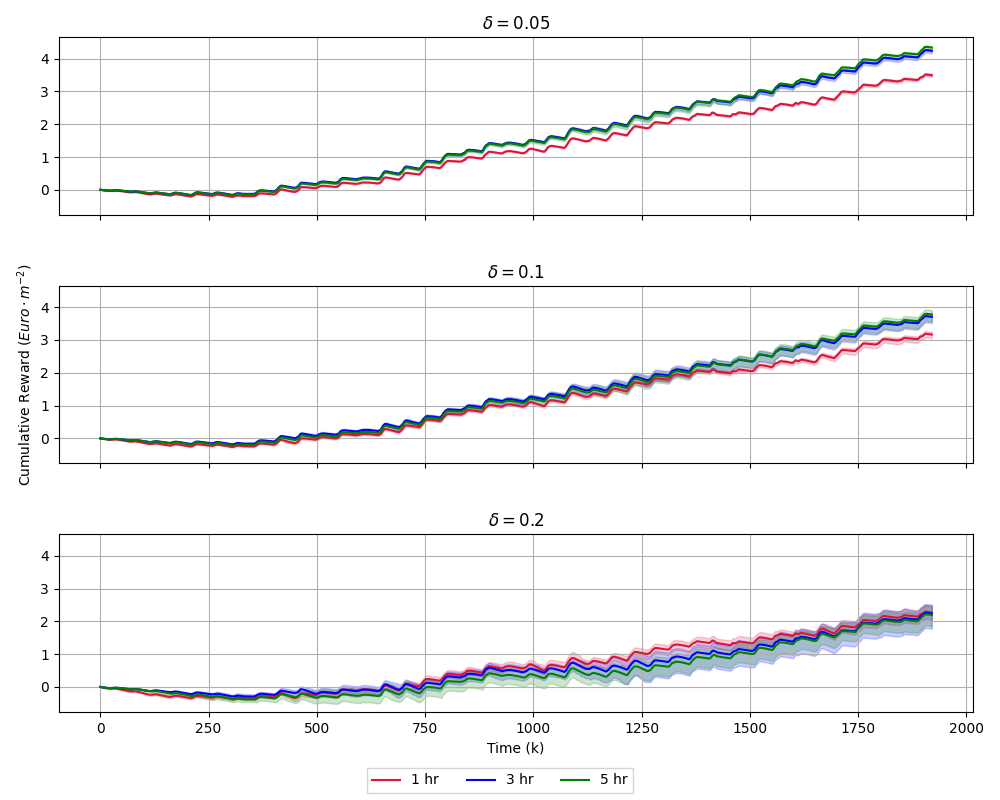

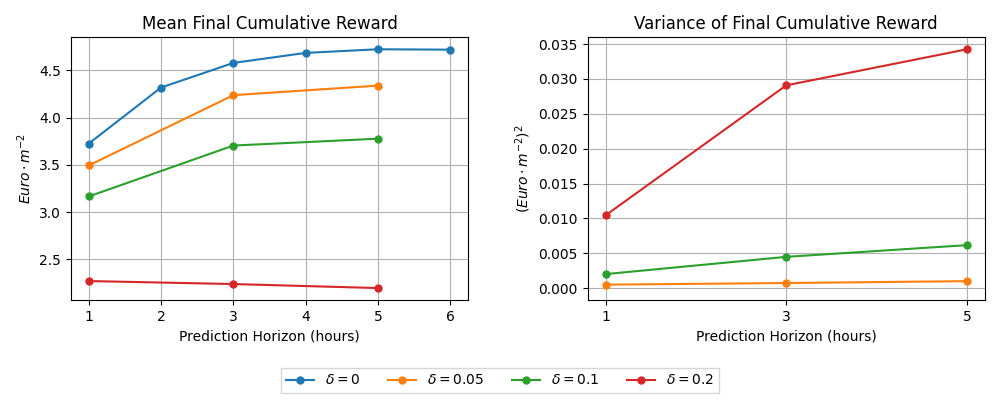

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [24]:
path = 'results/MPC/Stochastic/5_hr/scale_' + str(0.05)

fig, ax = plt.subplots(3,1, sharex=True, sharey=True, figsize=(10,8))
noise = [0.05,0.1,0.2]

mean_rewards = {}
var_rewards = {}

for e,l in enumerate(noise):

    reward_logs = {}
    Y_logs = {}
    U_logs = {}
    comp_times = {}
    vf_logs = {}
     
    mean_rewards[l] = []
    var_rewards[l] = [] 
        
    t = range(1921) 
    toSee = [1,3,5]
    for j in toSee:
        path = 'results/MPC/Stochastic/'+str(j)+'_hr/scale_' + str(l)
        reward_logs[str(j)] = []
        Y_logs[str(j)] = []
        U_logs[str(j)] = []
        comp_times[str(j)] = []
        vf_logs[str(j)] = []
        for sim in range(30):
            sim_path = "/Sim_" + str(sim) + '/'
            reward_logs[str(j)].append( loadtxt(path + sim_path + 'rewards_log.csv' , delimiter=',') )
            Y_logs[str(j)].append( loadtxt(path + sim_path + 'Y_log.csv' , delimiter=',') )
            U_logs[str(j)].append( loadtxt(path + sim_path + 'U_log.csv' , delimiter=',') )
            comp_times[str(j)].append( loadtxt(path + sim_path + 'comp_time_log.csv' , delimiter=',') )
            if os.path.exists(path + sim_path + 'vf_log.csv'):
                vf_logs[str(j)].append( loadtxt(path + sim_path + 'vf_log.csv', delimiter=',') )
            
            
    # print (reward_logs.items())       
    stacked_rewards_1 = np.stack(reward_logs[str(toSee[0])])
    stacked_rewards_2 = np.stack(reward_logs[str(toSee[1])])
    stacked_rewards_3 = np.stack(reward_logs[str(toSee[2])])

    avg_rewards_1 = np.mean(stacked_rewards_1, axis=0)
    avg_rewards_2 = np.mean(stacked_rewards_2, axis=0)
    avg_rewards_3 = np.mean(stacked_rewards_3, axis=0)
    
    var_rewards_1 = np.var(stacked_rewards_1, axis=0)
    var_rewards_2 = np.var(stacked_rewards_2, axis=0)
    var_rewards_3 = np.var(stacked_rewards_3, axis=0)

    min_rewards_1 = np.min(stacked_rewards_1, axis=0)
    max_rewards_1 = np.max(stacked_rewards_1, axis=0)

    min_rewards_2 = np.min(stacked_rewards_2, axis=0)
    max_rewards_2 = np.max(stacked_rewards_2, axis=0)

    min_rewards_3 = np.min(stacked_rewards_3, axis=0)
    max_rewards_3 = np.max(stacked_rewards_3, axis=0)


    mean_rewards[l] = [avg_rewards_1[-1],avg_rewards_2[-1],avg_rewards_3[-1]]    
    var_rewards[l] = [var_rewards_1[-1],var_rewards_2[-1],var_rewards_3[-1]]

    ax[e].plot (t,avg_rewards_1, color = "crimson",label = str(toSee[0]) + " hr")
    ax[e].fill_between(t, min_rewards_1, max_rewards_1, color="crimson", alpha=0.2)

    ax[e].plot (t,avg_rewards_2, color = "blue",label = str(toSee[1]) + " hr")
    ax[e].fill_between(t, min_rewards_2, max_rewards_2, color="blue", alpha=0.2)

    ax[e].plot (t,avg_rewards_3, color = "green", label = str(toSee[2]) + " hr")
    ax[e].fill_between(t, min_rewards_3, max_rewards_3, color="green", alpha=0.2)
    ax[e].grid()
    ax[e].set_title("$\delta = $" + str(l))
    # ax[e].legend()
    
    
ax[1].set_ylabel("Cumulative Reward ($Euro \cdot m^{-2}$)")
ax[2].set_xlabel("Time (k)")    
# fig.suptitle("Average Cumulative Reward vs Prediction Horizon")
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.00), fancybox=False, shadow=False, ncol = 3)
plt.tight_layout()
fig.subplots_adjust(bottom=0.11,hspace=0.4)
plt.show()



plt.savefig('TU Delft Thesis/figures/stochastic_mpc_rewards_time.pdf', format='pdf')

tt = [1,3,5]
fig, (ax1,ax2) = plt.subplots(1,2, sharex=False, sharey=False, figsize = (10,4))
ax1.plot ([1,2,3,4,5,6],perf, marker = ".", markersize = 10, label = "$\delta=$"+str(0))
ax1.plot (tt,mean_rewards[0.05], label = "$\delta=$" + str(0.05), marker = ".", markersize = 10)
ax1.plot (tt,mean_rewards[0.1], label = "$\delta=$" + str(0.1), marker = ".", markersize = 10)
ax1.plot (tt,mean_rewards[0.2], label = "$\delta=$" + str(0.2), marker = ".", markersize = 10)

ax1.set_title("Mean Final Cumulative Reward")
ax1.set_ylabel("$Euro \cdot m^{-2}$")
ax1.set_xlabel("Prediction Horizon (hours)")
# ax1.xticks(range(len(tt)), tt)
ax1.grid()

ax2.plot ([0,0,0],label  = "$\delta=$"+str(0), alpha = 0)
ax2.plot (var_rewards[0.05], label = "$\delta=$" + str(0.05), marker = ".", markersize = 10)
ax2.plot (var_rewards[0.1], label = "$\delta=$" + str(0.1), marker = ".", markersize = 10)
ax2.plot (var_rewards[0.2], label = "$\delta=$" + str(0.2), marker = ".", markersize = 10)

ax2.set_xticks(range(len(tt)), tt)
ax2.set_ylabel("$(Euro \cdot m^{-2})^2$")
ax2.set_xlabel("Prediction Horizon (hours)")
ax2.set_title("Variance of Final Cumulative Reward")
ax2.grid()

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.00), fancybox=False, shadow=False, ncol = 4)
plt.tight_layout()
fig.subplots_adjust(bottom=0.25,wspace=0.3)
plt.show()
plt.savefig('TU Delft Thesis/figures/stochastic_mpc_perf.eps', format='eps')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


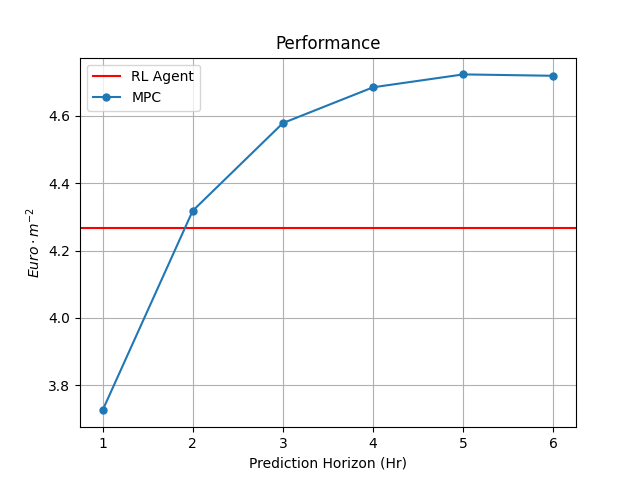

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


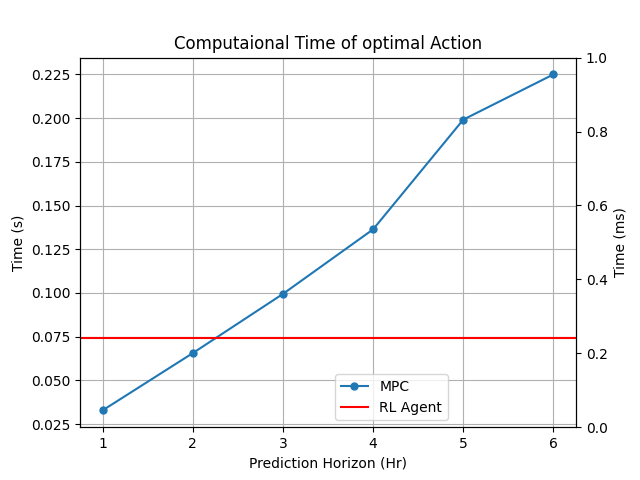

In [31]:
agent_1_r              = loadtxt('results/RL/Deterministic/agent_11_abs/rewards_log.csv', delimiter=',')
agent_1_t              = loadtxt('results/RL/Deterministic/agent_11_abs/comp_time_log.csv', delimiter=',')

t = [1,2,3,4,5,6]
mpc_r = [mpc_1hr_r[-1],mpc_2hr_r[-1],mpc_3hr_r[-1],mpc_4hr_r[-1],mpc_5hr_r[-1],mpc_6hr_r[-1]]
mpc_t = [mpc_1hr_t[-1],mpc_2hr_t[-1],mpc_3hr_t[-1],mpc_4hr_t[-1],mpc_5hr_t[-1],mpc_6hr_t[-1]]
plt.figure ()
plt.axhline(agent_1_r[-1], label = 'RL Agent',color='r')
plt.plot (t, mpc_r, label = 'MPC',marker = ".", markersize = 10)
plt.legend()
plt.xlabel("Prediction Horizon (Hr)")
plt.ylabel("$Euro \cdot m^{-2}$")
plt.title("Performance")
plt.grid()
plt.savefig('TU Delft Thesis/figures/mpc_vs_rl_perf.eps', format='eps')
plt.show()

fig,ax = plt.subplots()

ax2 = ax.twinx()  

ax2.axhline(np.mean(agent_1_t)*1000, label = 'RL Agent',color='r')
ax.plot (t, mpc_t, label = 'MPC',marker = ".", markersize = 10)
# ax.legend()
# ax2.legend()
ax.set_xlabel("Prediction Horizon (Hr)")
ax.set_ylabel("Time (s)")
ax2.set_ylabel("Time (ms)")
ax.set_title("Computaional Time of optimal Action")
ax.grid()

# Get the handles and labels for both axes
handles1, labels1 = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Create the legend
ax.legend(handles=handles1 + handles2, labels=labels1 + labels2, bbox_to_anchor=(0.5, 0), loc='lower left')

fig.savefig('TU Delft Thesis/figures/mpc_vs_rl_time.eps', format='eps')
plt.show()




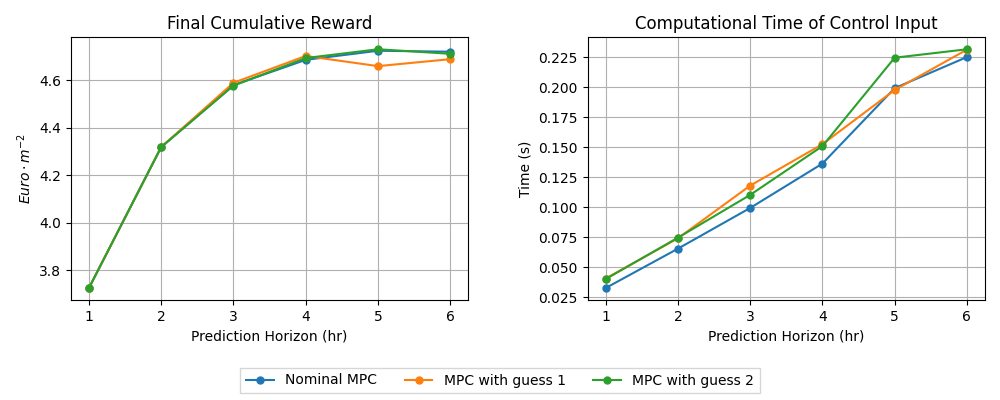

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [32]:
rlmpc_impl_1_r = {}
rlmpc_impl_1_t = {}

rlmpc_impl_2_r = {}
for j in range(1,3):
    rlmpc_impl_1_r[j] = {}
    rlmpc_impl_1_t[j] = {}

    for i in range (1,7):
        path_r = 'results/RL_MPC/Deterministic/Impl_1_guess_'+str(j)+'/'+str(i)+'_hr/Sim_0/rewards_log.csv'
        path_t = 'results/RL_MPC/Deterministic/Impl_1_guess_'+str(j)+'/'+str(i)+'_hr/Sim_0/comp_time_log.csv'
        rlmpc_impl_1_r[j][i] = loadtxt(path_r, delimiter=',')
        rlmpc_impl_1_t[j][i] = loadtxt(path_t, delimiter=',')

rlmpc_impl1_1_guess_1_r =[rlmpc_impl_1_r[1][1][-1],rlmpc_impl_1_r[1][2][-1],rlmpc_impl_1_r[1][3][-1],rlmpc_impl_1_r[1][4][-1],rlmpc_impl_1_r[1][5][-1],rlmpc_impl_1_r[1][6][-1]]
rlmpc_impl1_1_guess_2_r =[rlmpc_impl_1_r[2][1][-1],rlmpc_impl_1_r[2][2][-1],rlmpc_impl_1_r[2][3][-1],rlmpc_impl_1_r[2][4][-1],rlmpc_impl_1_r[2][5][-1],rlmpc_impl_1_r[2][6][-1]]

rlmpc_impl1_1_guess_1_t =[rlmpc_impl_1_t[1][1][-1],rlmpc_impl_1_t[1][2][-1],rlmpc_impl_1_t[1][3][-1],rlmpc_impl_1_t[1][4][-1],rlmpc_impl_1_t[1][5][-1],rlmpc_impl_1_t[1][6][-1]]
rlmpc_impl1_1_guess_2_t =[rlmpc_impl_1_t[2][1][-1],rlmpc_impl_1_t[2][2][-1],rlmpc_impl_1_t[2][3][-1],rlmpc_impl_1_t[2][4][-1],rlmpc_impl_1_t[2][5][-1],rlmpc_impl_1_t[2][6][-1]]
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
ax1.plot (t,mpc_r,marker = ".", markersize = 10, label = "Nominal MPC")
ax1.plot (t,rlmpc_impl1_1_guess_1_r,marker = ".", markersize = 10, label = "MPC with guess 1")
ax1.plot (t,rlmpc_impl1_1_guess_2_r,marker = ".", markersize = 10, label = "MPC with guess 2")
ax1.grid ()
ax1.set_title("Final Cumulative Reward")
ax1.set_xlabel("Prediction Horizon (hr)")
ax1.set_ylabel("$Euro \cdot m^{-2}$")

ax2.plot (t,mpc_t,marker = ".", markersize = 10, label = "Nominal MPC")
ax2.plot (t,rlmpc_impl1_1_guess_1_t,marker = ".", markersize = 10,label = "MPC with guess 1")
ax2.plot (t,rlmpc_impl1_1_guess_2_t,marker = ".", markersize = 10,label = "MPC with guess 2")
ax2.grid()
ax2.set_title("Computational Time of Control Input")
ax2.set_xlabel("Prediction Horizon (hr)")
ax2.set_ylabel("Time (s)")

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.00), fancybox=False, shadow=False, ncol = 4)
plt.tight_layout()
fig.subplots_adjust(bottom=0.25,wspace=0.3)
plt.show()
plt.savefig('TU Delft Thesis/figures/rl_mpc_impl_1.eps', format='eps')

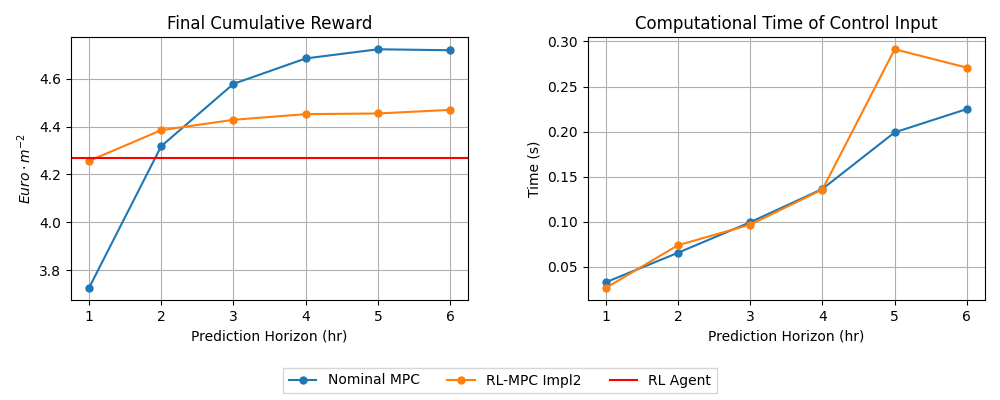

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [33]:
rlmpc_impl_2_r = {}
rlmpc_impl_2_t = {}

final_rlmpc_impl_2_r = []
final_rlmpc_impl_2_t = []

for i in range (1,7):
    path_r = 'results/RL_MPC/Deterministic/Impl_2/'+str(i)+'_hr/Sim_0/rewards_log.csv'
    path_t = 'results/RL_MPC/Deterministic/Impl_2/'+str(i)+'_hr/Sim_0/comp_time_log.csv'
    rlmpc_impl_2_r[i] = loadtxt(path_r, delimiter=',')
    rlmpc_impl_2_t[i] = loadtxt(path_t, delimiter=',')
    
    final_rlmpc_impl_2_r.append(rlmpc_impl_2_r[i][-1])
    final_rlmpc_impl_2_t.append(rlmpc_impl_2_t[i][-1])
    

fig,(ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
ax1.plot (t,mpc_r,marker = ".", markersize = 10, label = "Nominal MPC")
ax1.plot (t,final_rlmpc_impl_2_r,marker = ".", markersize = 10, label = "RL-MPC Impl2")
ax1.axhline(agent_1_r[-1], label = 'RL Agent',color='r')
ax1.grid ()
ax1.set_title("Final Cumulative Reward")
ax1.set_xlabel("Prediction Horizon (hr)")
ax1.set_ylabel("$Euro \cdot m^{-2}$")


ax2.plot (t,mpc_t,marker = ".", markersize = 10, label = "Nominal MPC")
ax2.plot (t,final_rlmpc_impl_2_t,marker = ".", markersize = 10,label = "RL-MPC Impl2")
ax2.grid()
ax2.set_title("Computational Time of Control Input")
ax2.set_xlabel("Prediction Horizon (hr)")
ax2.set_ylabel("Time (s)")

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.00), fancybox=False, shadow=False, ncol = 4)
plt.tight_layout()
fig.subplots_adjust(bottom=0.25,wspace=0.3)
plt.show()
plt.savefig('TU Delft Thesis/figures/rl_mpc_impl_2.eps', format='eps')

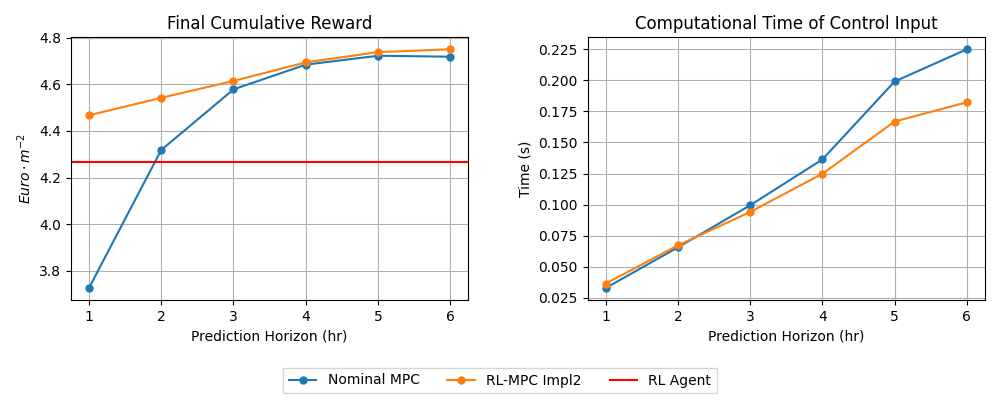

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [36]:
rlmpc_impl_3_r = {}
rlmpc_impl_3_t = {}

final_rlmpc_impl_3_r = []
final_rlmpc_impl_3_t = []
ttt = []

for i in range (1,7):
    path_r = 'results/RL_MPC/Deterministic/Impl_3/'+str(i)+'_hr/Sim_0/rewards_log.csv'
    path_t = 'results/RL_MPC/Deterministic/Impl_3/'+str(i)+'_hr/Sim_0/comp_time_log.csv'
    rlmpc_impl_3_r[i] = loadtxt(path_r, delimiter=',')
    rlmpc_impl_3_t[i] = loadtxt(path_t, delimiter=',')
    
    final_rlmpc_impl_3_r.append(rlmpc_impl_3_r[i][-1])
    final_rlmpc_impl_3_t.append(rlmpc_impl_3_t[i][-1])
    ttt.append(i)
    
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
ax1.plot (t,mpc_r,marker = ".", markersize = 10, label = "Nominal MPC")
ax1.plot (ttt,final_rlmpc_impl_3_r,marker = ".", markersize = 10, label = "RL-MPC Impl2")
ax1.axhline(agent_1_r[-1], label = 'RL Agent',color='r')
ax1.grid ()
ax1.set_title("Final Cumulative Reward")
ax1.set_xlabel("Prediction Horizon (hr)")
ax1.set_ylabel("$Euro \cdot m^{-2}$")


ax2.plot (t,mpc_t,marker = ".", markersize = 10, label = "Nominal MPC")
ax2.plot (ttt,final_rlmpc_impl_3_t,marker = ".", markersize = 10,label = "RL-MPC Impl3")
ax2.grid()
ax2.set_title("Computational Time of Control Input")
ax2.set_xlabel("Prediction Horizon (hr)")
ax2.set_ylabel("Time (s)")

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.00), fancybox=False, shadow=False, ncol = 4)
plt.tight_layout()
fig.subplots_adjust(bottom=0.25,wspace=0.3)
plt.show()
plt.savefig('TU Delft Thesis/figures/rl_mpc_impl_3.eps', format='eps')